In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from utils import (
    get_runs, get_generated_rooms, get_fitness_vars, get_enemies_by_run_indexes, get_obstacles_by_run_indexes,
    plot_for_each_level,
    vars_columns
)

In [2]:
runs = get_runs()
generated_rooms = get_generated_rooms()
fitness_vars = get_fitness_vars()

In [3]:
folder_path = './figs/completion_rate_analysis/'
runs_and_generated_rooms_df = pd.merge(runs, generated_rooms, on='fitness_vars_id', how='inner')

# Pergunta de Pesquisa: "O número de iterações do algoritmo genético afeta a qualidade dos níveis gerados?"

## Taxa de Conclusão x Iteração

Objetivo: Avaliar se o aumento no número de iterações do algoritmo genético gera níveis que são mais facilmente completados.

### Scatter plot

#### Plot para cada nível

C:\Users\jonas\AppData\Local\Temp\ipykernel_22356\927336532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_rate'] = df['iterations'].map(completion_rate)


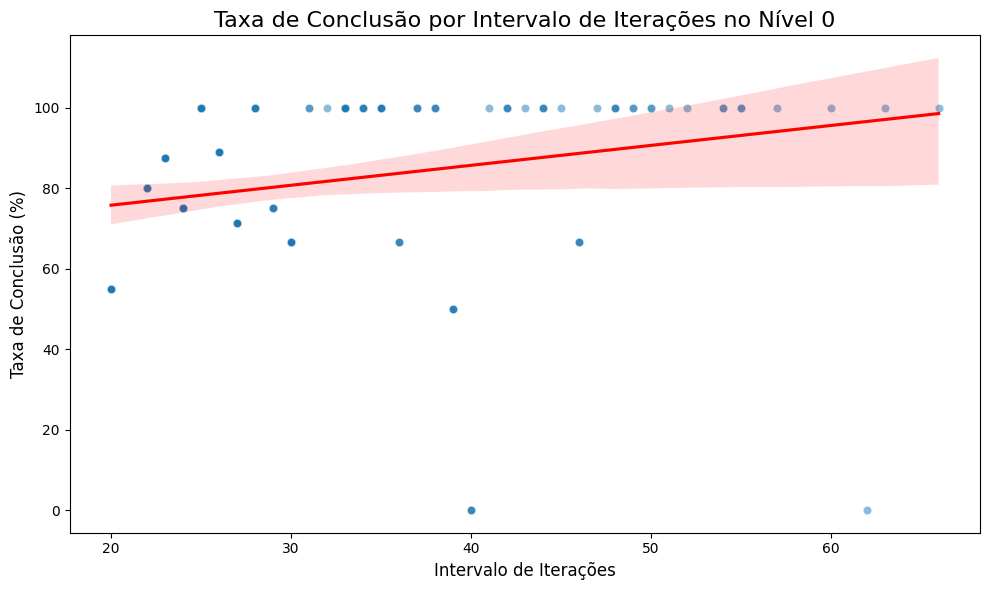

C:\Users\jonas\AppData\Local\Temp\ipykernel_22356\927336532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_rate'] = df['iterations'].map(completion_rate)


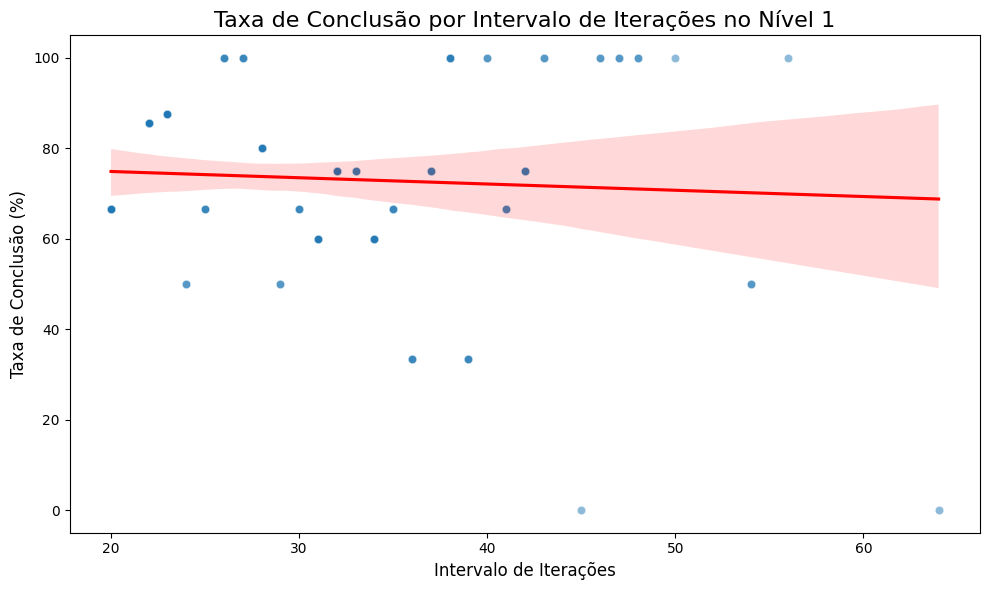

C:\Users\jonas\AppData\Local\Temp\ipykernel_22356\927336532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_rate'] = df['iterations'].map(completion_rate)


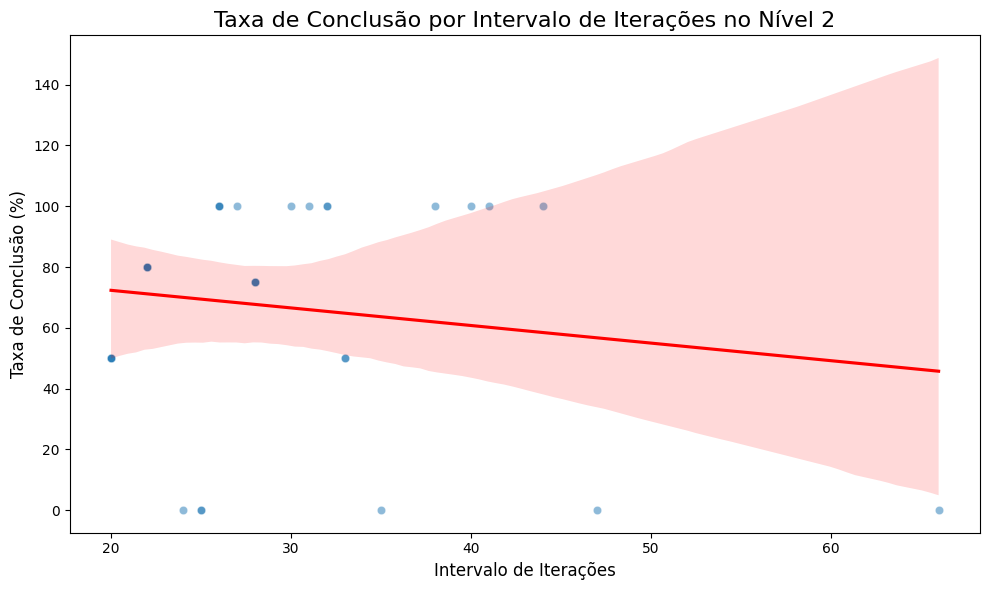

In [4]:
def plot_iterations_conclusion_scatter(df, level=None):
    completion_rate = df.groupby('iterations')['is_completed'].mean() * 100
    df['completion_rate'] = df['iterations'].map(completion_rate)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='iterations', y='completion_rate', data=df, alpha=0.5)
    sns.regplot(x='iterations', y='completion_rate', data=df, scatter=False, color='red', label='Tendência Linear')
    plt.xlabel('Intervalo de Iterações', fontsize=12)
    plt.ylabel('Taxa de Conclusão (%)', fontsize=12)

    if level is not None:
        plt.title(f'Taxa de Conclusão por Intervalo de Iterações no Nível {level}', fontsize=16)
        plt.savefig(f'{folder_path}/iterations_x_conclusions_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Taxa de Conclusão por Intervalo de Iterações', fontsize=16)
        plt.savefig(f'{folder_path}/iterations_x_conclusions.png', dpi=96, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

plot_for_each_level(runs_and_generated_rooms_df, plot_iterations_conclusion_scatter)

#### Tudo em um plot só

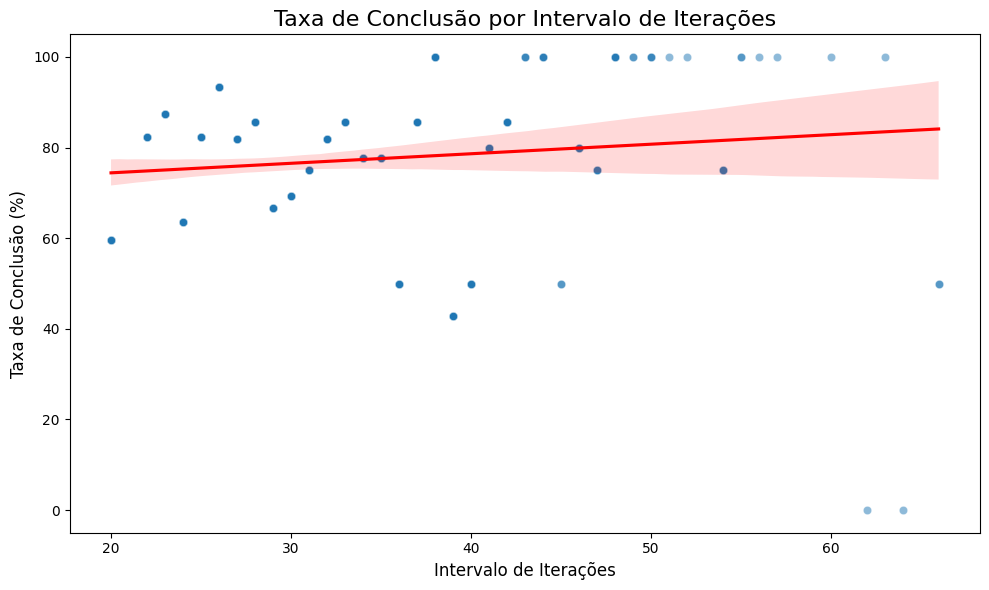

In [5]:
completion_rate = runs_and_generated_rooms_df.groupby('iterations')['is_completed'].mean() * 100
runs_and_generated_rooms_df['completion_rate'] = runs_and_generated_rooms_df['iterations'].map(completion_rate)

plot_iterations_conclusion_scatter(runs_and_generated_rooms_df)

#### Resultado: linha ascendente, quanto mais iterações levou, maiores foram as taxas de conclusão

### Correlação

#### Plot para cada nível

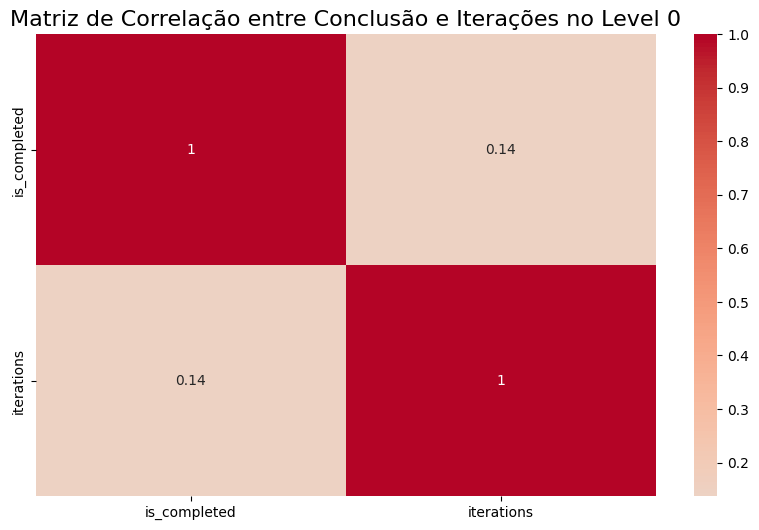

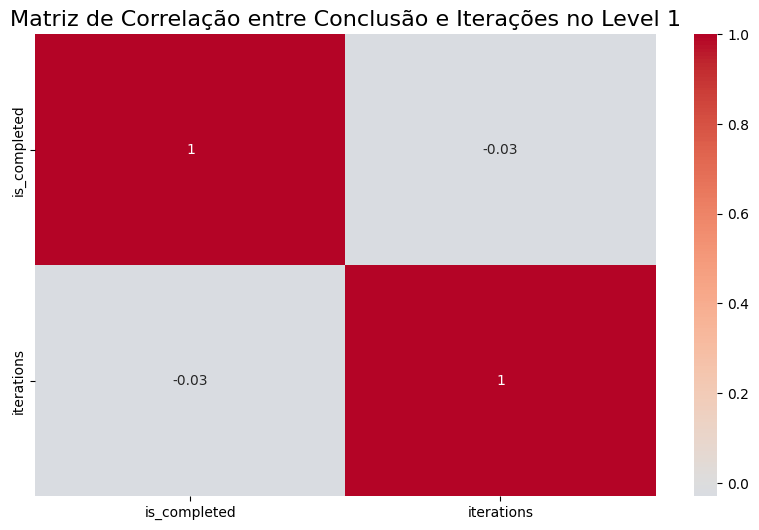

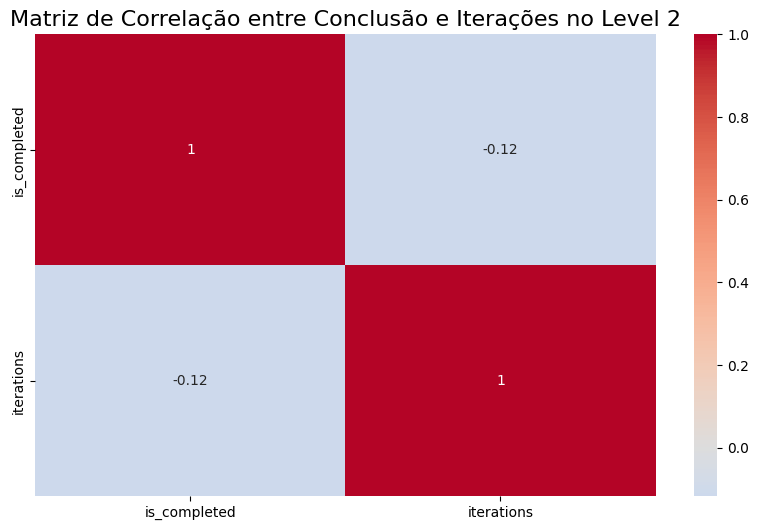

In [6]:
def plot_iterations_conclusion_correlation(df, level=None):
    correlation = df[['is_completed', 'iterations']].corr()
    #print(correlation['is_completed'])

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

    if level is not None:
        plt.title(f"Matriz de Correlação entre Conclusão e Iterações no Level {level}", fontsize=16)
        plt.savefig(f'{folder_path}/conclusion_iterations_correlation_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title("Matriz de Correlação entre Conclusão e Iterações", fontsize=16)
        plt.savefig(f'{folder_path}/conclusion_iterations_correlation.png', dpi=96, bbox_inches='tight')

    plt.show()

plot_for_each_level(runs_and_generated_rooms_df, plot_iterations_conclusion_correlation)

#### Tudo em um plot só

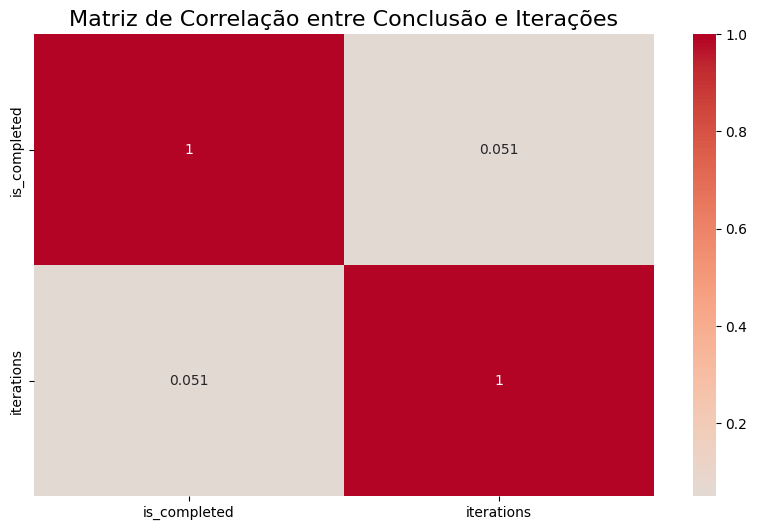

In [7]:
plot_iterations_conclusion_correlation(runs_and_generated_rooms_df)

## Taxa de Conclusão x fitness

Objetivo: Verificar se os níveis com maior valor de fitness são mais frequentemente completados.

### Scatter plot

#### Um plot por nível

C:\Users\jonas\AppData\Local\Temp\ipykernel_22356\291778124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_rate'] = df['percent'].map(completion_rate)


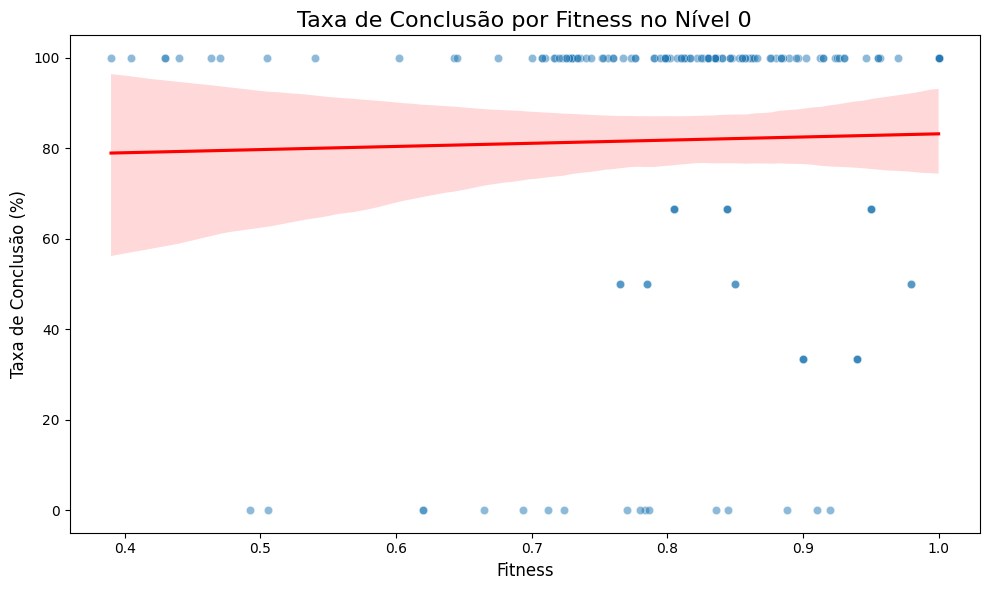

C:\Users\jonas\AppData\Local\Temp\ipykernel_22356\291778124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_rate'] = df['percent'].map(completion_rate)


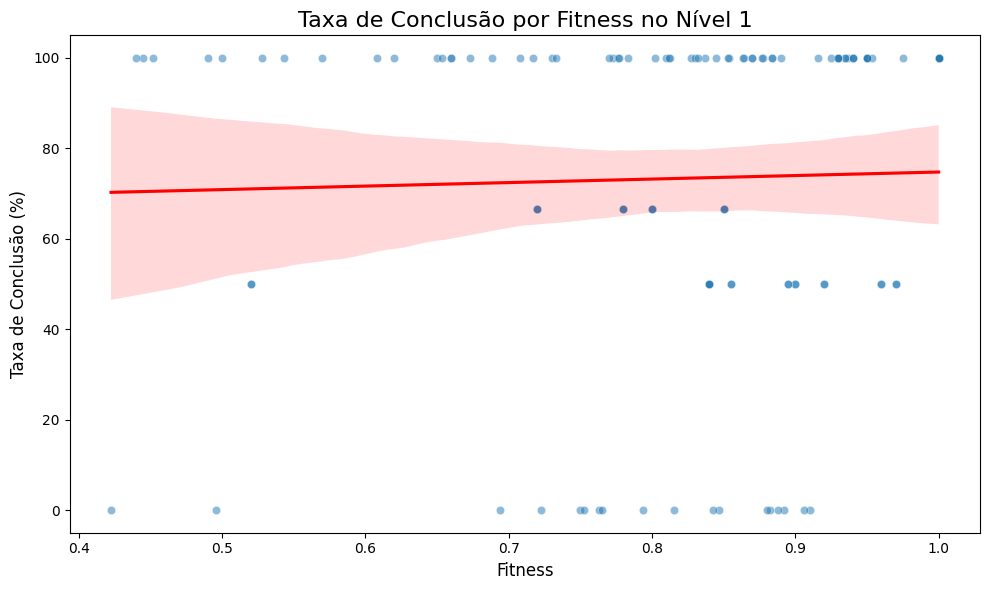

C:\Users\jonas\AppData\Local\Temp\ipykernel_22356\291778124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['completion_rate'] = df['percent'].map(completion_rate)


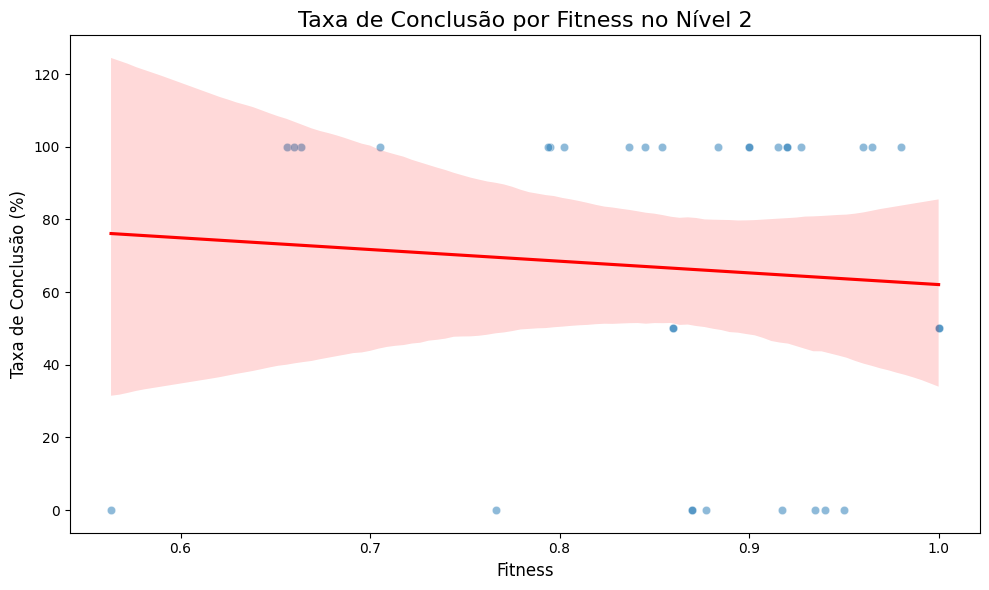

In [8]:
def plot_conclusion_fitness_scatter(df, level=None):
    completion_rate = df.groupby('percent')['is_completed'].mean() * 100
    df['completion_rate'] = df['percent'].map(completion_rate)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='percent', y='completion_rate', data=df, alpha=0.5)
    sns.regplot(x='percent', y='completion_rate', data=df, scatter=False, color='red', label='Tendência Linear')
    plt.title(f'Taxa de Conclusão por Fitness no Nível {level}', fontsize=14)
    plt.xlabel('Fitness', fontsize=12)
    plt.ylabel('Taxa de Conclusão (%)', fontsize=12)

    if level is not None:
        plt.title(f'Taxa de Conclusão por Fitness no Nível {level}', fontsize=16)
        plt.savefig(f'{folder_path}/percent_x_conclusions_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title('Taxa de Conclusão por Fitness', fontsize=16)
        plt.savefig(f'{folder_path}/percent_x_conclusions.png', dpi=96, bbox_inches='tight')
        
    plt.tight_layout()
    plt.show()

plot_for_each_level(runs_and_generated_rooms_df, plot_conclusion_fitness_scatter)

#### Tudo em um plot só

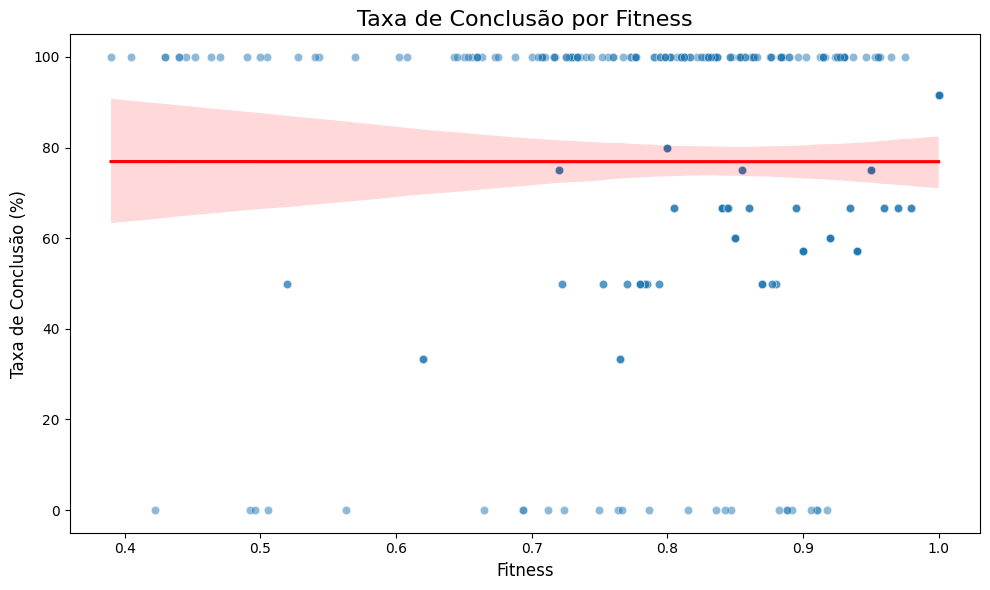

In [9]:
completion_rate = runs_and_generated_rooms_df.groupby('percent')['is_completed'].mean() * 100
runs_and_generated_rooms_df['completion_rate'] = runs_and_generated_rooms_df['percent'].map(completion_rate)

plot_conclusion_fitness_scatter(runs_and_generated_rooms_df)

### Correlação

#### Plot para cada nível

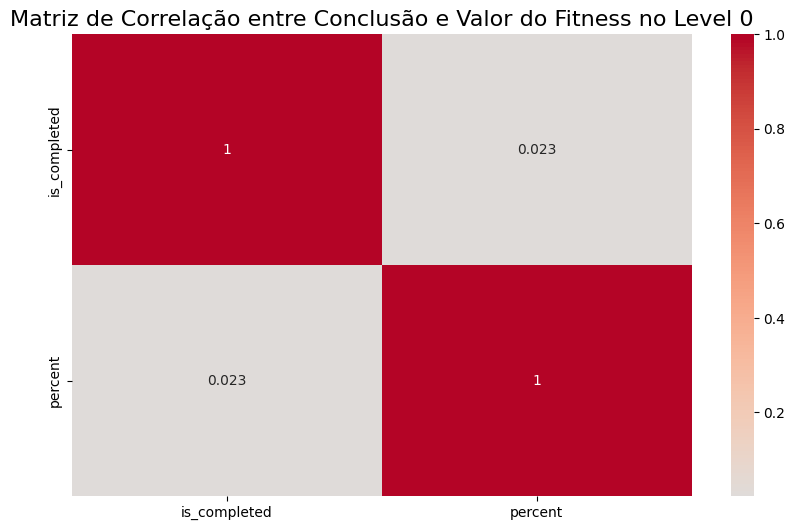

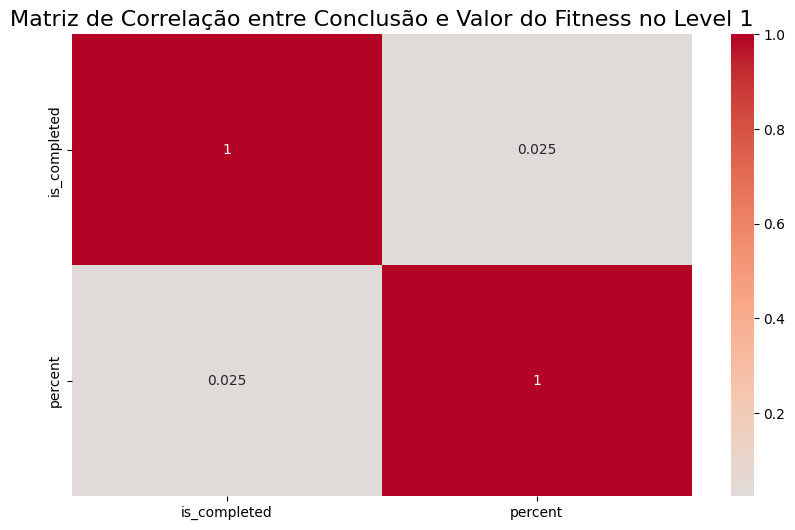

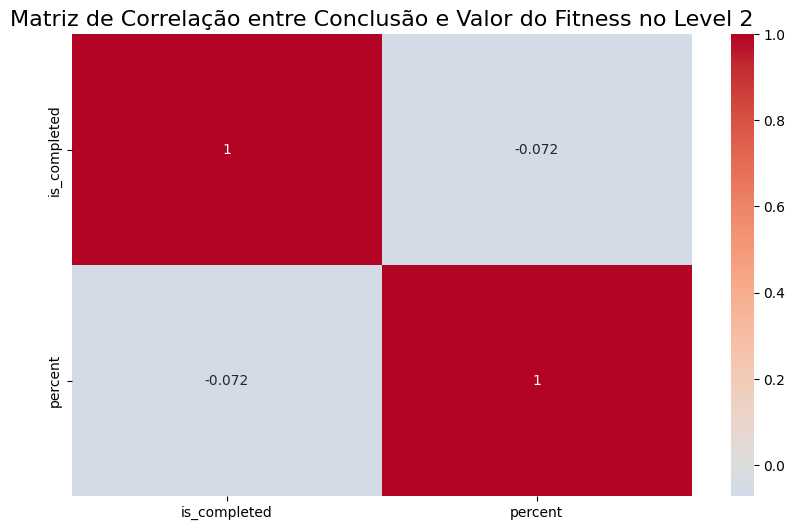

In [10]:
def plot_fitness_conclusion_correlation(df, level=None):
    correlation = df[['is_completed', 'percent']].corr()
    #print(correlation['is_completed'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    if level is not None:
        plt.title(f"Matriz de Correlação entre Conclusão e Valor do Fitness no Level {level}", fontsize=16)
        plt.savefig(f'{folder_path}/conclusion_best_value_correlation_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title("Matriz de Correlação entre Conclusão e Valor do Fitness", fontsize=16)
        plt.savefig(f'{folder_path}/conclusion_best_value_correlation.png', dpi=96, bbox_inches='tight')
    plt.show()

plot_for_each_level(runs_and_generated_rooms_df, plot_fitness_conclusion_correlation)

#### Tudo em um plot só

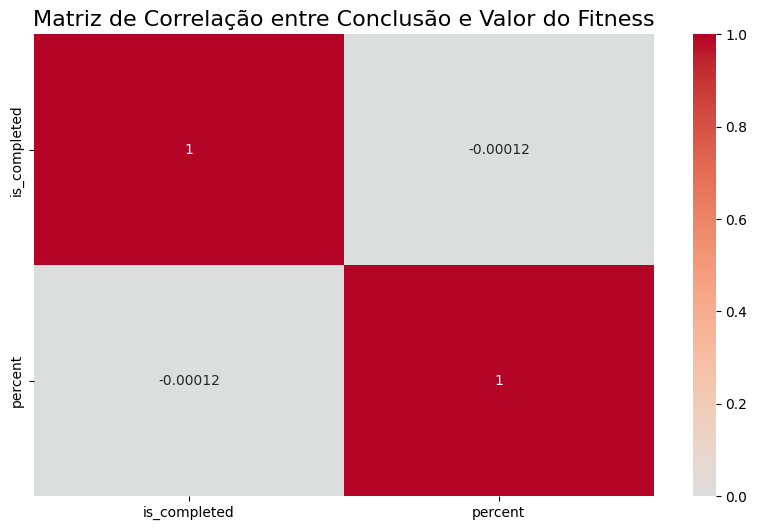

In [11]:
plot_fitness_conclusion_correlation(runs_and_generated_rooms_df)

## Taxa de Conclusão x Nível

   Level  Success_Rate
0      0     81.410256
1      1     73.275862
2      2     66.666667


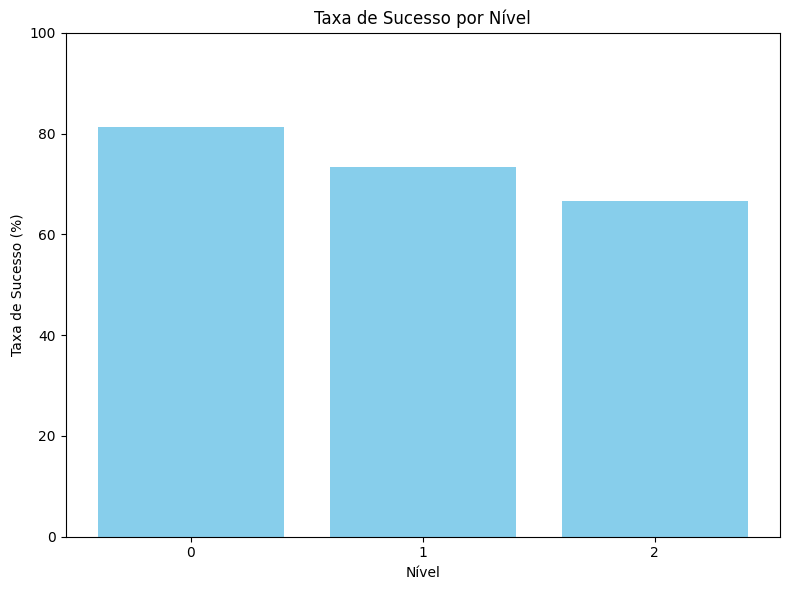

In [12]:
success_rates = []

for level in runs['level'].unique():
    filtered_level = runs[runs['level'] == level]
    
    total_attempts = len(filtered_level)
    total_completed = filtered_level['is_completed'].sum()
    
    success_rate = (total_completed / total_attempts) * 100
    success_rates.append((level, success_rate))

df_success = pd.DataFrame(success_rates, columns=['Level', 'Success_Rate'])

print(df_success)

plt.figure(figsize=(8, 6))
plt.bar(df_success['Level'], df_success['Success_Rate'], color='skyblue')
plt.xlabel('Nível')
plt.ylabel('Taxa de Sucesso (%)')
plt.title('Taxa de Sucesso por Nível')
plt.xticks(df_success['Level'])
plt.ylim(0, 100)

plt.tight_layout()
plt.savefig(f'{folder_path}/conclusions_x_levels.png', dpi=96, bbox_inches='tight')
plt.show()

# Pergunta de Pesquisa: "Como os atributos de dificuldade impactam a taxa de conclusão das salas?"

Objetivo: Descobrir quais variáveis de fitness (como número de inimigos, distância entre inimigos, etc.) mais afetam a chance de o jogador completar uma sala.

In [ ]:
runs_and_fitness_vars_df = pd.merge(runs, fitness_vars, left_on='fitness_vars_id', right_on='id', how='inner')
runs_and_fitness_vars_df[vars_columns] = runs_and_fitness_vars_df[vars_columns].fillna(0)

## Impacto Individual das Variáveis de Fitness na Conclusão

Objetivo: Identificar quais variáveis de fitness têm a maior correlação com a conclusão ou falha do nível.

### Plot para cada nível

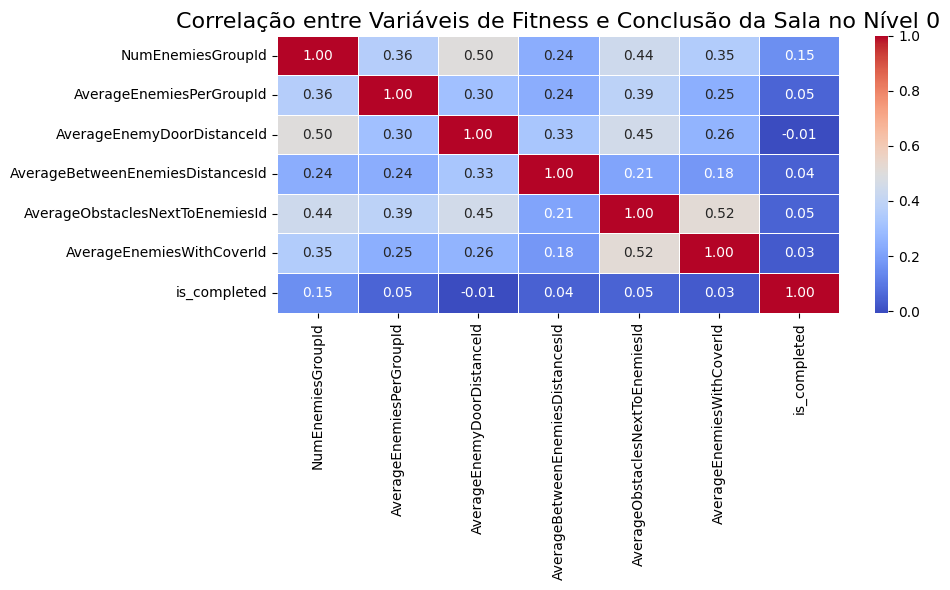

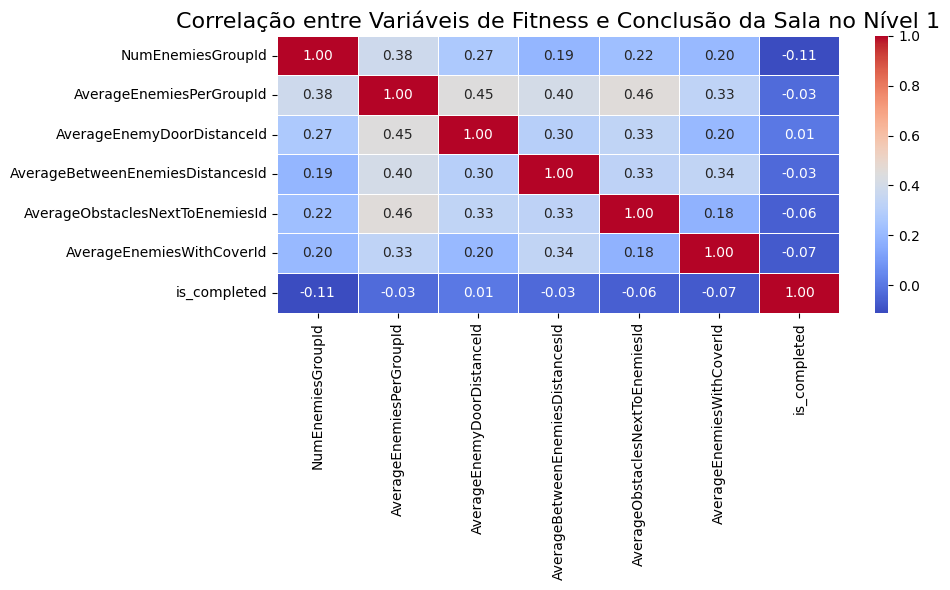

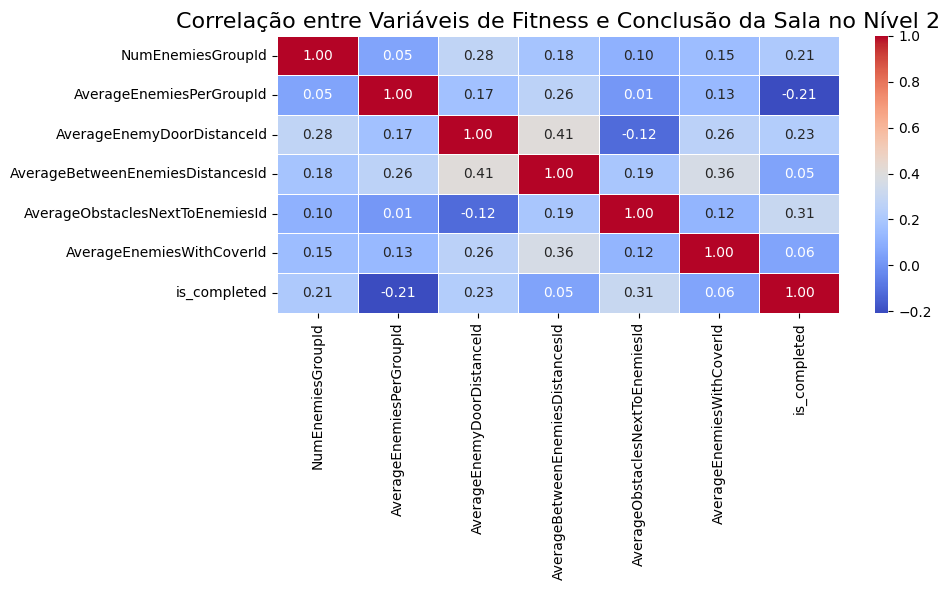

In [14]:
def plot_fitness_vars_conclusion_correlation(df, level=None):
    correlation_matrix = df[vars_columns + ['is_completed']].corr()
    #print(correlation_matrix['is_completed'])
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

    if level is not None:
        plt.title(f'Correlação entre Variáveis de Fitness e Conclusão da Sala no Nível {level}', fontsize=16)
        plt.savefig(f'{folder_path}/correlation_conclusion_fitness_vars_level_{level}.png', dpi=96, bbox_inches='tight')
    else:
        plt.title(f'Correlação entre Variáveis de Fitness e Conclusão da Sala', fontsize=16)
        plt.savefig(f'{folder_path}/correlation_conclusion_fitness_vars.png', dpi=96, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

plot_for_each_level(runs_and_fitness_vars_df, plot_fitness_vars_conclusion_correlation)

### Em um plot só

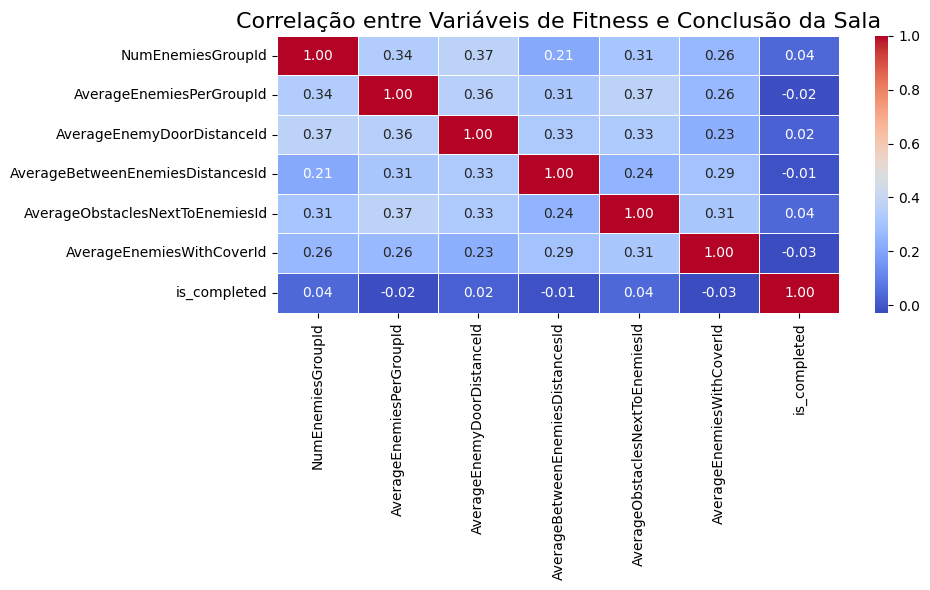

In [15]:
plot_fitness_vars_conclusion_correlation(runs_and_fitness_vars_df)

## Análise Multivariada (Regressão Logística)

In [16]:
X = runs_and_fitness_vars_df[vars_columns]
y = runs_and_fitness_vars_df['is_completed']

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)

result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.537069
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           is_completed   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                0.006366
Time:                        14:33:58   Log-Likelihood:                -162.73
converged:                       True   LL-Null:                       -163.77
Covariance Type:            nonrobust   LLR p-value:                    0.9117
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.1815      0.209      5.65

Resultados:

Nenhuma variável tem um coeficiente significativo, pois os p-valores para todas as variáveis estão bem acima de 0,05, sugerindo que não há evidências suficientes de que essas variáveis de fitness influenciam a taxa de conclusão de maneira estatisticamente significativa.

# Pergunta de Pesquisa: "O balanceamento de inimigos e obstáculos afeta a taxa de conclusão dos jogadores?"

Objetivo: Investigar se o balanceamento de inimigos e obstáculos dentro de uma sala impacta a taxa de sucesso dos jogadores.

## Número de Inimigos vs Obstáculos e Conclusão:
Objetivo: Ver se a relação entre o número de inimigos e obstáculos na sala afeta a taxa de sucesso.

In [17]:
for level in runs['level'].unique():
    runs_filtered_level = runs[runs['level'] == level]

    enemies = get_enemies_by_run_indexes(runs_filtered_level['id'])
    obstacles = get_obstacles_by_run_indexes(runs_filtered_level['id'])

    total_enemies_per_run = enemies.groupby('run_id')['quantity'].sum().reset_index(name='total_enemies')
    total_obstacles_per_run = obstacles.groupby('run_id')['quantity'].sum().reset_index(name='total_obstacles')

    runs_with_enemies_obstacles = pd.merge(runs_filtered_level, total_enemies_per_run, left_on='id', right_on='run_id', how='left')
    runs_with_enemies_obstacles = pd.merge(runs_with_enemies_obstacles, total_obstacles_per_run, left_on='id', right_on='run_id', how='left')

    correlation_enemies = runs_with_enemies_obstacles['total_enemies'].corr(runs_with_enemies_obstacles['is_completed'])
    correlation_obstacles = runs_with_enemies_obstacles['total_obstacles'].corr(runs_with_enemies_obstacles['is_completed'])

    print(f"Level: {level}")
    print(f"Correlação entre o número de inimigos e conclusão: {correlation_enemies:.3f}")
    print(f"Correlação entre o número de obstáculos e conclusão: {correlation_obstacles:.3f}")

Level: 0
Correlação entre o número de inimigos e conclusão: 0.066
Correlação entre o número de obstáculos e conclusão: -0.023
Level: 1
Correlação entre o número de inimigos e conclusão: -0.148
Correlação entre o número de obstáculos e conclusão: -0.010
Level: 2
Correlação entre o número de inimigos e conclusão: -0.356
Correlação entre o número de obstáculos e conclusão: -0.108


Interpretação:

Inimigos: Conforme o nível avança, parece que o número de inimigos tem um impacto maior na dificuldade, especialmente no level 2, onde a correlação negativa é mais acentuada. Isso pode estar relacionado ao aumento do "orçamento" e à presença de inimigos em maior quantidade.

Obstáculos: O efeito dos obstáculos é consistentemente negativo, mas muito menos significativo, indicando que eles podem ser menos desafiadores do que os inimigos em termos de conclusão de níveis.